# Выявление определяющих успешность игры закономерностей

**Цель проекта:** выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании 2017-ого года.

**Задачи:** изучим общую информацию представленного нам файла с данными, после подготовки данных проводим исследовательский анализ данных и составим портрет пользователя каждого региона для определения показателей, влияющих на успешность игры.

Для исследования нам были выданы из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Данные за 2016 год могут быть неполными.

###  Открываем файл с данными и изучаем общую информацию

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/datasets/games.csv')

In [5]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


###  Подготовка данных

#### Приведём название столбцов к нижнему регистру

In [6]:
df = df.rename(columns={'Name': 'name', 'Platform': 'platform',
                       'Year_of_Release': 'year_of_release', 'Genre': 'genre',
                       'Other_sales': 'other_sales', 'Critic_Score': 'critic_score',
                       'User_Score': 'user_score', 'Rating': 'rating',}
              )
df.head(5)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Преобразование данных в нужные типы

In [7]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
df.loc[df['year_of_release'] == 0, 'year_of_release'] = np.NAN

df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NAN
df['user_score'] = df['user_score'].astype(float)

В столбце year_of_release данные были преобразованы из float в int, т.к. год выпуска игры может быть только целочисленным значением. В столбце user_score данные были пребразованы в float.

Для проведения дальнейших расчётов в столбце user_score заменим 'tbd' (аббревиатура от английского To Be Determined - подлежит определению) на Nan, после чего вместе со всеми пропущенными значениями заменим на медиану столбца. Раз оценка подлежит определению, справедливо будет считать её за пропущенную.

#### Обработка пропусков

In [8]:
df.query('name.isna()')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
df = df.query('not name.isna()')
df['name'].isna().sum()

0

У игры нет названия, жанра, а также отсутствуют какие-либо оценки и рейтинги, поэтому её можно не учитывать в нашем исследовании.

In [10]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В 1998-ом году рейтинг K-A был переименован в рейтинг E. Для удобства переименуем данные

In [11]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
nan_rating = df.query('rating.isna()')
nan_rating['name'].nunique()

5852

Слишком много игр, чтобы можно было бы вручную проставить пропущенные рейтинги. Поэтому было принято решение заменить пропущенные значения ('Nan') на 'unknown'.

In [13]:
df.loc[df['rating'].isna(), 'rating'] = 'unknown'
df['rating'].isna().sum()

0

Пропущенные значения в строках c оценкой критиков и игроков мы оставим, т.к, вероятнее всего, значения пропущенны не случайно, а потому что для некоторых игр пользователи и критики не выставили свои оценки. 

Удалим строки с пропущенными годами

In [14]:
df = df.query('not year_of_release.isna()')
df['year_of_release'].isna().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


#### Подсчёт суммарной продажи во всех регионах

In [16]:
df['total_sales'] = df['NA_sales']+df['EU_sales']+df['JP_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


#### Проверка на явные дубликаты

In [17]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют

###  Исследовательский анализ данных

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Годы выпуска игр'),
 Text(0.5, 0, 'год выпуска'),
 Text(0, 0.5, 'количество игр')]

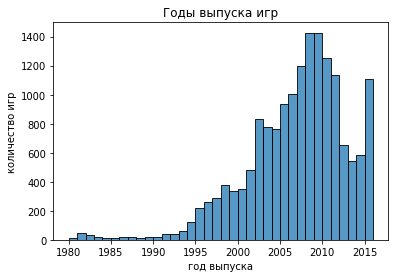

In [58]:
(
    sns.histplot(df['year_of_release'], binwidth=1)
    .set(title='Годы выпуска игр', xlabel='год выпуска', ylabel='количество игр')
)

С каждым годом количество выпускаемых игр растёт, пока не доходит до пика в 2008-2009 годах, после чего оно падает. В 2016-ом году количество выпускаемых игр резко возрасло

Text(0, 0.5, 'суммарное количество проданных копий, млн')

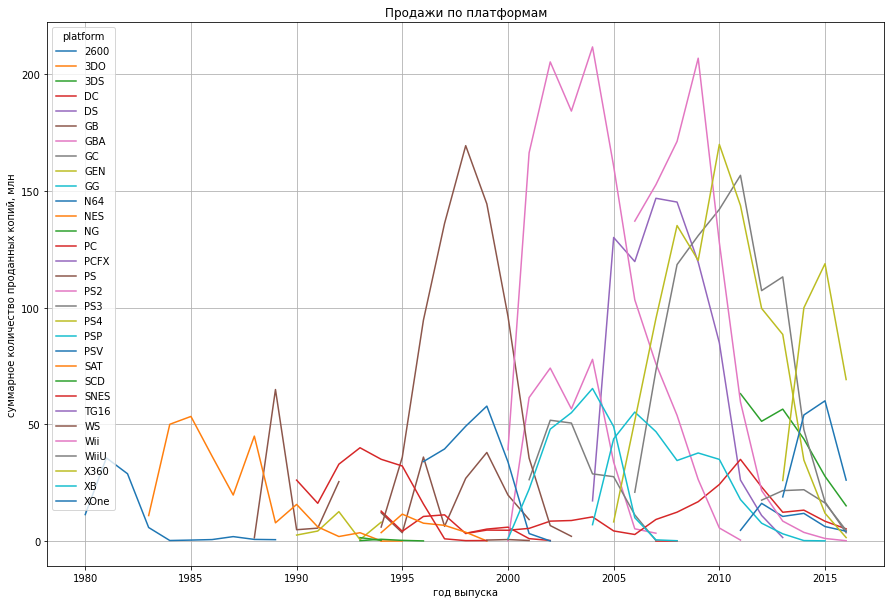

In [19]:
ax=(
    df.pivot_table(index='year_of_release', columns ='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15, 10), title='Продажи по платформам', )
)
ax.set_xlabel('год выпуска')
ax.set_ylabel('суммарное количество проданных копий, млн')

In [20]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

В среднем, раз в 5 лет появляются новые и исчезают старые игровые платформы, заменяя друг друга на более продвинутые модели.

Однако можно наблюдать, как PC игры стабильно продаются, начиная с начала 90-ых по сегодняшний день, не уходя с рынка, благодаря чему её можно считать достаточно стабильной платформой.


Выше представлен рейтинг 5 платформ по суммарному количеству проданных копий за всё время.

Text(0, 0.5, 'суммарное количество проданных копий, млн')

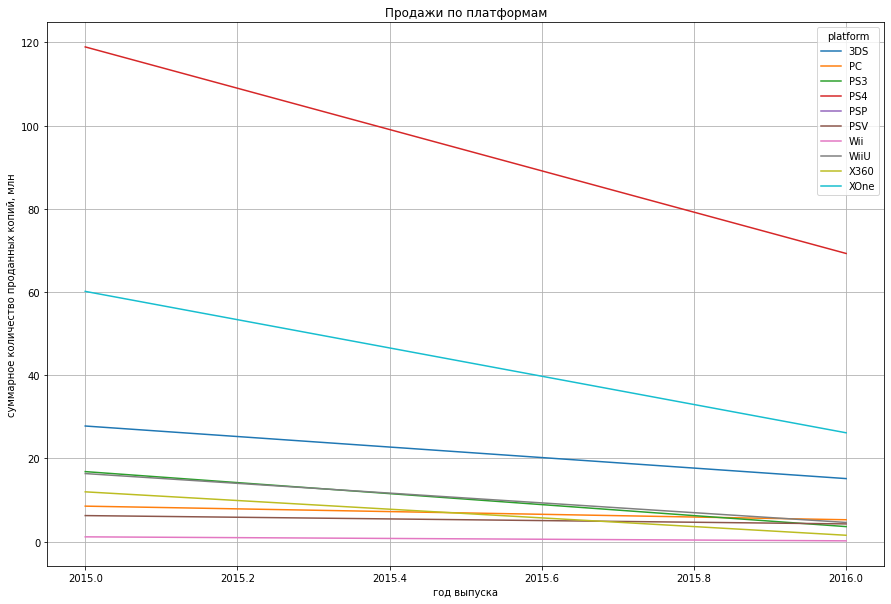

In [21]:
actualy_df = df.query('year_of_release>=2015')
actualy_df_ax = (
    actualy_df.pivot_table(index='year_of_release', columns ='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15, 10), title='Продажи по платформам')
)
actualy_df_ax.set_xlabel('год выпуска')
actualy_df_ax.set_ylabel('суммарное количество проданных копий, млн')

In [22]:
actualy_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
Name: total_sales, dtype: float64

Можно заметить, что хоть уровни сумарного количества проданных копий за всё время у таких платформ, как WII, X360 и PS3 самые высокие, в период 2015-2016 годах заметно падение уровня продаж игр на всех платформах (за исключением игр для PC). 

Выше представлен рейтинг 5 платформ по суммарному количеству проданных копий за 2015-2016 года. Однако стоит учесть, что количество продаж игр для этих платформ, скорее всего, будет и дальше падать, а игры на таких платформах, как WII и X360 так и вовсе в следующем году могут исчезнуть с рынка.

Также такой спад продаж игр может свидетельствовать о появлении новых игровых платформ в ближайшем будущем, как это было в предыдущие годы.

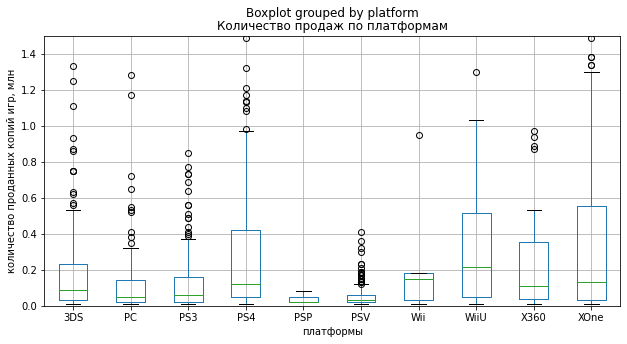

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


In [82]:
ax = actualy_df.boxplot(column='total_sales', by='platform', figsize=(10, 5))
ax.set_xlabel('платформы')
ax.set_ylabel('количество проданных копий игр, млн')
ax.set_title('Количество продаж по платформам')
plt.ylim(0, 1.5)
plt.show()

actualy_df.groupby('platform')['total_sales'].describe()

По боксплотам можно отметить, что большее количество продаж, в среднем, на 2015-2016 года имеют игры, выпускаемые для Xbox One, WiiU, PS4 и Xbox 360. Первый квартиль для каждой платформы расположен на значении 0.02-0.05 млн проданных копий, что свидетельствует о том, что большинство игр продаются в небольшом количестве копий. Медиана смещена в сторону к первому квартилю, что ещё раз подтверждает прошлое утверждение. Исключение состовляют игры для платформы Wii, датасет которой имеет скошенность в отрицательную сторону.

In [61]:
actualy_PS4 = actualy_df.query('platform=="PS4"')
actualy_other_platforms = actualy_df.query('platform!="PS4"')

Корреляция между отзывами пользователей и продажами:  -0.05973845712638215


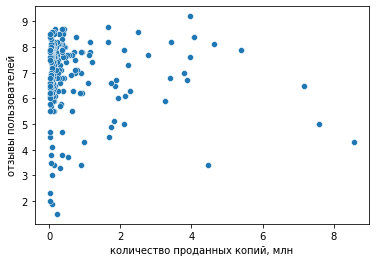

In [41]:
(
    sns.scatterplot(data=actualy_PS4, x="total_sales", y="user_score")
    .set(xlabel='количество проданных копий, млн', ylabel='отзывы пользователей')
)
print('Корреляция между отзывами пользователей и продажами: ', actualy_PS4["total_sales"].corr(actualy_PS4["user_score"]))

Корреляция между отзывами критиков и продажами:  0.3928485555130601


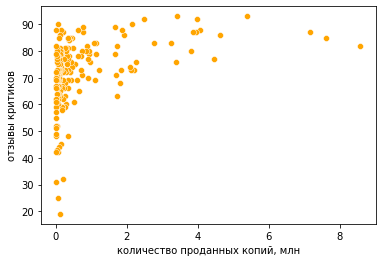

In [67]:
(
    sns.scatterplot(data=actualy_PS4, x="total_sales", y="critic_score", color="orange")
    .set(xlabel='количество проданных копий, млн', ylabel='отзывы критиков')
)
print('Корреляция между отзывами критиков и продажами: ', actualy_PS4["total_sales"].corr(actualy_PS4["critic_score"]))

Корреляция между отзывами пользователей и продажами:  0.01752113065632156


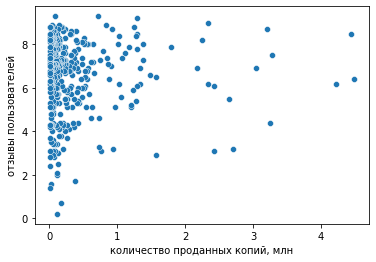

In [63]:
(
    sns.scatterplot(data=actualy_other_platforms, x="total_sales", y="user_score")
    .set(xlabel='количество проданных копий, млн', ylabel='отзывы пользователей')
)
print('Корреляция между отзывами пользователей и продажами: ', actualy_other_platforms["total_sales"].corr(actualy_other_platforms["user_score"]))

Корреляция между отзывами критиков и продажами:  0.3032430209852095


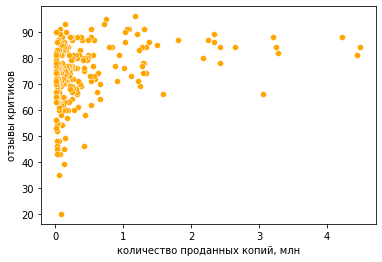

In [66]:
(
    sns.scatterplot(data=actualy_other_platforms, x="total_sales", y="critic_score", color="orange")
    .set(xlabel='количество проданных копий, млн', ylabel='отзывы критиков')
)
print('Корреляция между отзывами критиков и продажами: ', actualy_other_platforms["total_sales"].corr(actualy_other_platforms["critic_score"]))

В обоих случаях, корреляция слишком мала, чтобы судить о прямой (отзывы критиков) и обратной (отзывы пользователей) зависимостях продаж от отзывов. Однако, рассмотрев графики рассеивания, можно отметить зависимость: игры с высокими отзывами как пользователей, так и критиков, имеют в среднем большее количиство продаж, чем игры с низкими отзывами; причём это не зависит от того, какую платформу рассматривать.

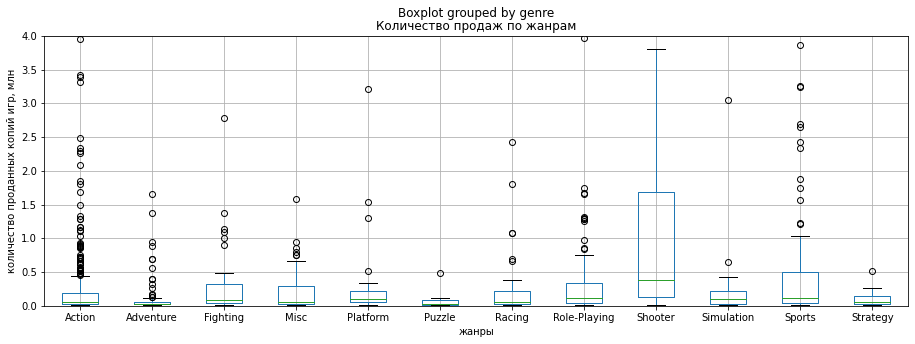

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,431.0,0.236961,0.525858,0.01,0.0200,0.060,0.190,4.62
Adventure,110.0,0.108909,0.254260,0.01,0.0200,0.030,0.060,1.66
Fighting,37.0,0.334324,0.549695,0.01,0.0400,0.090,0.330,2.78
Misc,71.0,0.199577,0.286718,0.01,0.0300,0.060,0.290,1.58
Platform,28.0,0.331429,0.667387,0.01,0.0575,0.100,0.220,3.21
Puzzle,7.0,0.102857,0.170070,0.01,0.0150,0.030,0.085,0.48
Racing,42.0,0.258571,0.497342,0.01,0.0300,0.055,0.215,2.42
Role-Playing,132.0,0.422879,1.028082,0.01,0.0400,0.115,0.340,7.17
Shooter,81.0,1.305309,2.227297,0.01,0.1300,0.380,1.690,14.63


In [83]:
cx=actualy_df.boxplot(column='total_sales', by='genre', figsize=(15, 5))
cx.set_xlabel('жанры')
cx.set_ylabel('количество проданных копий игр, млн')
cx.set_title('Количество продаж по жанрам')
plt.ylim(0, 4)
plt.show()

actualy_df.groupby('genre')['total_sales'].describe()

Самый стабильно приносящий высокий доход жанр - шутеры. Второе и третье места по стабильному доход занимают спортивные и RP игры соответственно. Самый низкий доход приносят игры, принадлежащие жанру головоломок и экшну.

###  Составление портрета пользователя каждого региона

#### Самые популярные платформы

In [29]:
def top_5_regions(data, region):
    return display(actualy_df.pivot_table(index=data, values=region, aggfunc='sum')
                   .sort_values(by=region, ascending=False).head()
                  )

##### Топ 5 популярных платформ в Европе:

In [30]:
top_5_regions('platform', 'EU_sales')

,EU_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30


##### Топ 5 популярных платформ в Северной Америке:

In [31]:
top_5_regions('platform', 'NA_sales')

,NA_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05


##### Топ 5 популярных платформ в Японии:

In [33]:
top_5_regions('platform', 'JP_sales')

,JP_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12


Для американского и европейских рынков характерны одинаковые лидирующие платформы: PS4 и Xbox One. Также в Европе люди чаще покупают игры для PC, чем в Японии и Северной Америке. В Японии же большой популярностью пользуются игры для протативных игровых систем  3DS и PS Vita, а также игры для PS4, которая занимает лидирующую позицию по продажам для всех регионов.

#### Самые популярные жанры

##### Топ 5 популярных жанров в Европе:

In [34]:
top_5_regions('genre', 'EU_sales')

,EU_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52


##### Топ 5 популярных жанров в Северной Америке:

In [35]:
top_5_regions('genre', 'NA_sales')

,NA_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58


##### Топ 5 популярных жанров в Японии:

In [36]:
top_5_regions('genre', 'JP_sales')

,JP_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


Рейтинг продаж по жанрам для Европы и Северной Америки практически схож: большой спрос имеют шутеры, экшн-игры, спортивные игры и RP игры. В Японии лидирующие позиции занимают два жанра: экшн-игры и RP игры.

#### Влияние рейтинга ESRB на продажи

##### Топ 5 популярных жанров в Европе:

In [40]:
top_5_regions('rating', 'EU_sales')

,EU_sales
rating,
M,45.54
unknown,35.71
E,34.83
T,20.32
E10+,11.54


##### Топ 5 популярных жанров в Северной Америке:

In [38]:
top_5_regions('rating', 'NA_sales')

,NA_sales
rating,
M,47.03
unknown,37.44
E,26.59
T,22.86
E10+,17.87


##### Топ 5 популярных жанров в Японии:

In [41]:
top_5_regions('rating', 'JP_sales')

,JP_sales
rating,
unknown,32.89
T,7.70
E,5.25
M,4.29
E10+,3.27


В рейтингах не представлены такие рейтинги ESRB, как AO, EC, RP, т.к. такие игры за рассматриваемый нами период не выходили. В целом, за всё время, таких игры выпускалось в очень небольшом количистве.

В Европе и Северной Америке топ продаж игр в зависимости от рейтинга совпадает: больше всего продаж имеют игры с рейтингом M. В Японии первое место занимает рейтинги, не указанные в столбце оценки ESRB, а игры с рейтингом M уже имеют крайне низкое количество продаж.

###  Проверка гипотезы

In [42]:
from scipy import stats as st

In [59]:
hypothesis_df = actualy_df.query('not user_score.isna()')

In [60]:
hypothesis_df

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16618,Xblaze: Lost Memories,PSV,2015.0,Adventure,0.01,0.00,0.00,0.00,NaN,7.0,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16652,Fast Racing Neo,WiiU,2016.0,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01


#### Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: Средняя оценка пользователей (user_score) игр на Xbox One = средняя оценка пользователей (user_score) игр на PC

H_1: Средняя оценка пользователей (user_score) игр на Xbox One ≠ средняя оценка пользователей (user_score) игр на PC

alpha = 0.05

In [61]:
results = st.ttest_ind(
    hypothesis_df[hypothesis_df['platform'] =='XOne']['user_score'],
    hypothesis_df[hypothesis_df['platform'] =='PC']['user_score'],
    equal_var = False
) 

alpha = 0.05 

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


**Вывод:** cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Проверка гипотезы: cредние пользовательские рейтинги жанров Action  и Sports разные

H_0: Средняя оценка пользователей (user_score) экшн-игр = средняя оценка пользователей (user_score) спортивных игр

H_1: Средняя оценка пользователей (user_score) экшн-игр ≠ средняя оценка пользователей (user_score) спортивных игр

alpha = 0.05

In [62]:
results = st.ttest_ind(
    hypothesis_df[hypothesis_df['genre'] =='Action']['user_score'],
    hypothesis_df[hypothesis_df['genre'] =='Sports']['user_score'],
    equal_var = False
) 

alpha = 0.05 

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


**Вывод:** cредние пользовательские рейтинги жанров Action и Sports разные

###  Общий вывод:

В результате исследования удалось выявить следующие определяющие успешность игры закономерности на 2017-ый год:

- количество продаж копий игр зависит от игровой платформы. Так, например, большее сумарное количество продаж, в среднем, на 2015-2016 года имеют игры, выпускаемые для Xbox One, WiiU, PS4 и Xbox 360. Если рассматривать этот параметр отдельно для каждого региона, то можно увидеть следующую закономерность: для американского и европейских рынков лидирующими платформами являются PS4 и Xbox One, когда как в Японии - 3DS и PS4. Лучше всего обратить внимание на PS4, которая занимает лидирующие позицию по продажам для всех регионов;


- количество продаж копий игр зависит от жанра, причём этот параметр варьируется в зависимости от региона. Рейтинг продаж по жанрам для Европы и Северной Америки практически схож: большой спрос имеют шутеры, экшн-игры, спортивные игры и RP игры. В Японии лидирующие позиции занимают два жанра: экшн-игры и RP игры;


- количество продаж копий игр зависит от рейтинга ESRB: в Северной Америке и Европе больше всего продаж имеют игры с рейтингом M, в то время как в Японии игры с этим рейтингом продаются в небольшом количестве;


- игры с высокими отзывами как пользователей, так и критиков, имеют в среднем большее количиство продаж, чем игры с низкими отзывами.

Вышепредставленные закономерности помогут сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 